#Project 3: Data Analytics - Exploratory Data Analysis (EDA) on Titanic
Dataset

• Description: Perform EDA on the Titanic dataset, examining
missing values, distribution of data, and relationships between
features. Use basic visualizations like histograms and correlation
heatmaps.
o Skills: Data wrangling, data visualization (Seaborn,
Matplotlib), basic understanding of statistics.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [52]:
df= pd.read_csv(r"C:\Users\harsh soni\Downloads\titanic3.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# DATA CLEANING

#Drop Irrelevant or High-Null Columns

In [91]:
df.drop(['body', 'cabin', 'boat', 'home.dest'], axis=1, inplace=True)

# CREATE TITLE

In [106]:
# Create a 'title' column by extracting from 'name'
df['title'] = df['name'].str.extract(r',\s*([^\.]+)\.')

# CATEGORISING TITLE AS NEW COLUMN AS TITLE MAP 

In [108]:
# Map rare and alternate titles to common categories
title_map = {
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Dr': 'Officer', 'Rev': 'Officer', 'Col': 'Officer',
    'Major': 'Officer', 'Capt': 'Officer', 'Sir': 'Noble',
    'Don': 'Noble', 'Dona': 'Noble', 'Lady': 'Noble',
    'the Countess': 'Noble', 'Jonkheer': 'Noble'
}

df['title'] = df['title'].map(title_map)


# REMOVING MISSING / NULL VALUES

In [116]:
df['age'] = df.groupby('title')['age'].transform(lambda x: x.fillna(x.median()))

In [126]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [128]:
df[df['fare'] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S,Mr
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,28.0,0,0,112051,0.0,S,Mr
125,1,0,"Fry, Mr. Richard",male,28.0,0,0,112058,0.0,S,Mr
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,Mr
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,S,Mr
223,1,0,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,S,Mr
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,Noble
363,2,0,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S,Mr
384,2,0,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S,Mr
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S,Mr


In [134]:
df['fare'].replace(0, pd.NA, inplace=True)
df['fare'] = df['fare'].replace(0, pd.NA).fillna(df['fare'].median())

# REMOVE DUPLICATES

In [136]:
df.drop_duplicates(inplace=True)

In [162]:
df.reset_index(drop=True, inplace=True) #CHECKING FINAL CLEAND DATA
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Miss
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Mr


# EXPLORATORY DATA ANALYSIS

#🧪 Tasks:

Distribution of data

Relationships between features

Basic visualizations (histograms, heatmaps)

In [175]:
print("shape", df.shape)   #DESCRIBE DIMENSION & SHAPE
df.info()

shape (1309, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
 10  title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [177]:
# Numerical summary
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.469432
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.646244
min,1.000000,0.000000,0.166700,0.000000,0.000000,3.170800
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.500000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


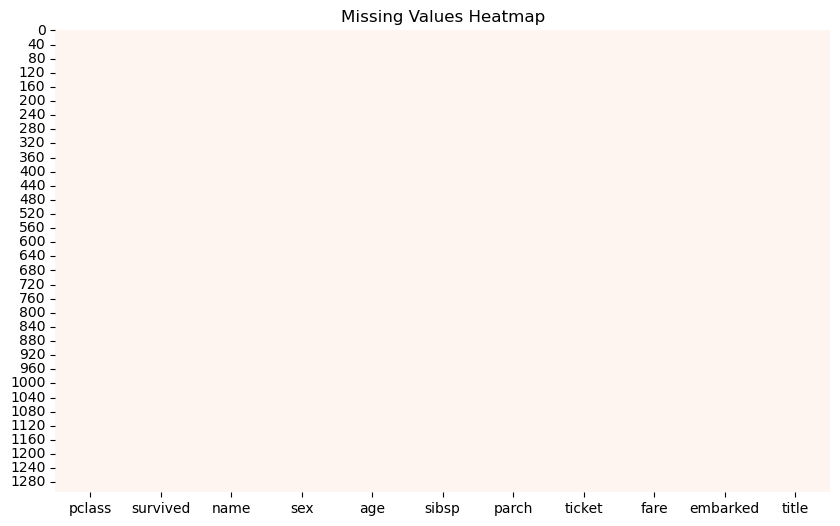

In [179]:
import seaborn as sns                      # Visualize missing values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap")
plt.show()

# DISTRIBUTION OF DATA

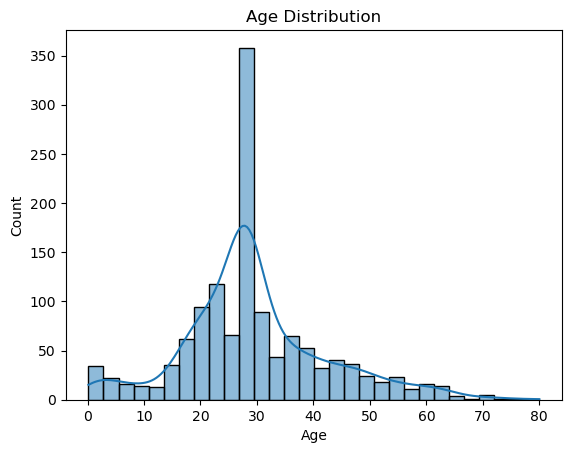

In [181]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

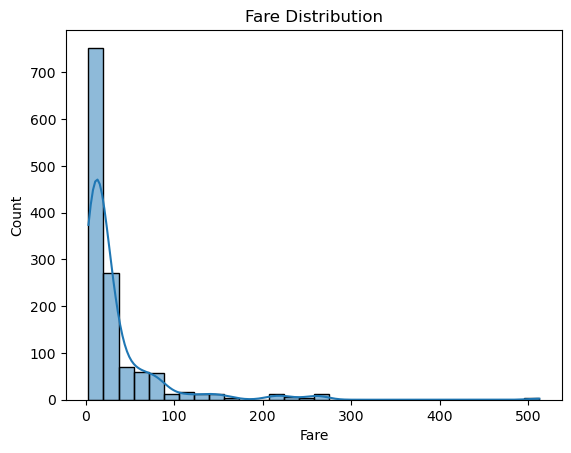

In [183]:
sns.histplot(df['fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Relationship Between Features

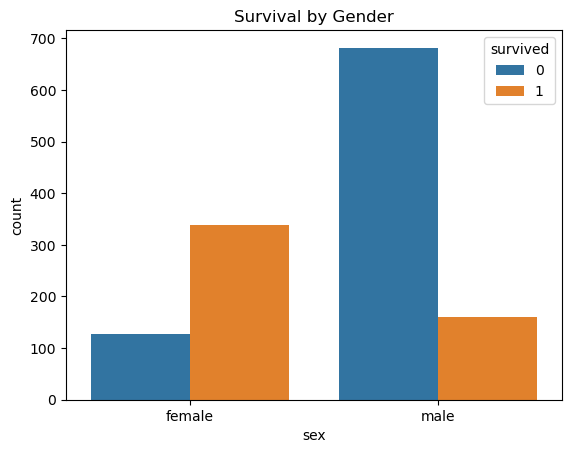

In [188]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

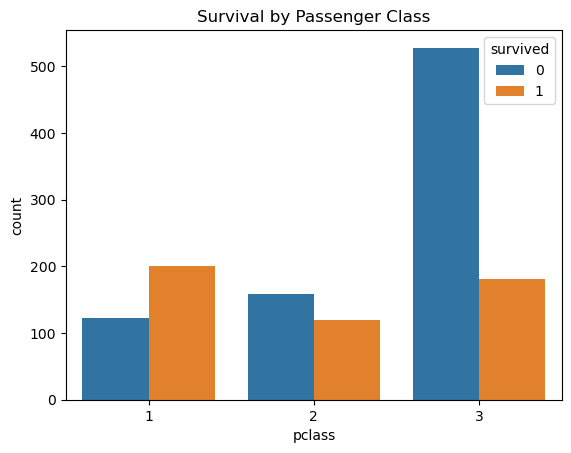

In [190]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

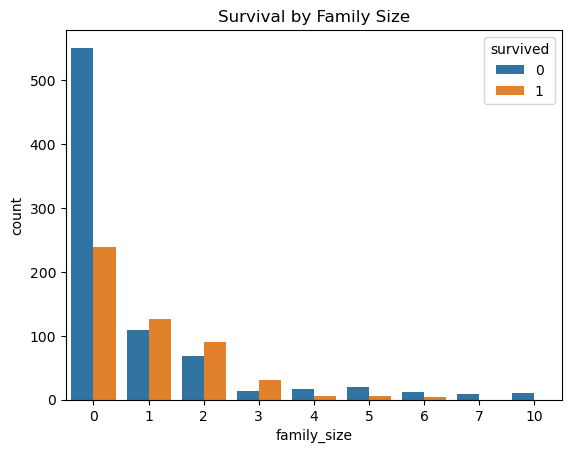

In [192]:
# Create a new feature: family_size = sibsp + parch
df['family_size'] = df['sibsp'] + df['parch']

sns.countplot(x='family_size', hue='survived', data=df)
plt.title("Survival by Family Size")
plt.show()

# Age vs Survival (Boxplot)

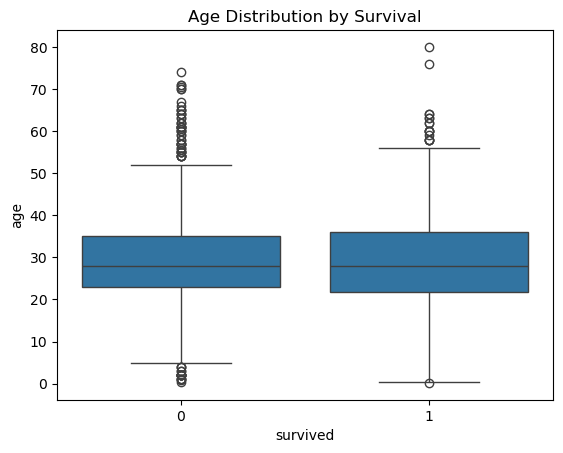

In [195]:
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

# Correlation Heatmap

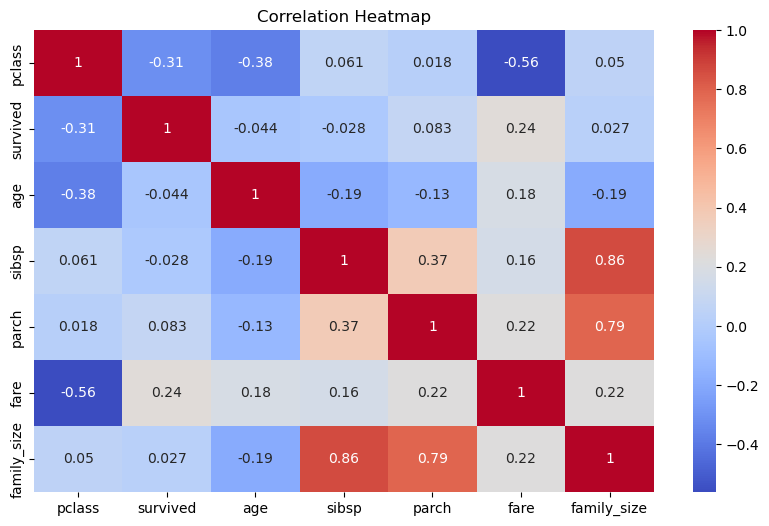

In [199]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()